In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')

descripciones = {
    "ANO": "Año en que ocurrió el evento",
    "MES": "Mes en que ocurrió el evento",
    "DIA": "Día en que ocurrió el evento",
    "DEPTO": "Departamento donde ocurrió el evento",
    "AREA": "Área geográfica (urbana o rural)",
    "VIC_SEXO": "Sexo de la víctima",
    "VIC_EDAD": "Edad de la víctima",
    "VIC_EST_CIV": "Estado civil de la víctima",
    "VIC_ESCOLARIDAD": "Nivel educativo de la víctima",
    "VIC_REL_AGR": "Relación víctima–agresor",
    "TOTAL_HIJOS": "Número total de hijos de la víctima",
    "AGR_SEXO": "Sexo del agresor",
    "AGR_EDAD": "Edad del agresor",
    "AGR_GRUPET": "Grupo etario del agresor",
    "TIPAGRE": "Tipo de agresión",
    "LEY_APLICABLE": "Ley aplicada",
    "RECUR_DENUN": "Entidad donde se interpuso la denuncia",
    "TIPO_EVENTO": "Tipo de evento",
    "MUNICIPIO": "Código del municipio",
    "EDAD_HOM": "Edad del hombre (divorcios)",
    "EDAD_MUJ": "Edad de la mujer (divorcios)",
    "ETNIA_HOM": "Etnia del hombre",
    "ETNIA_MUJ": "Etnia de la mujer",
    "ESCOLARIDAD_HOM": "Escolaridad del hombre",
    "ESCOLARIDAD_MUJ": "Escolaridad de la mujer",
    "OCUPACION_HOM": "Ocupación del hombre",
    "OCUPACION_MUJ": "Ocupación de la mujer"
}

pd.DataFrame({
    "Variable": df.columns,
    "Tipo de dato": df.dtypes.astype(str),
    "Significado": [descripciones.get(col, "No especificado") for col in df.columns]
})

/var/folders/ls/r_brwh_14l54j3kt17qt0xl80000gn/T/ipykernel_23797/2563661824.py:1: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')


,Variable,Tipo de dato,Significado
ANO,ANO,float64,Año en que ocurrió el evento
MES,MES,object,Mes en que ocurrió el evento
DIA,DIA,float64,Día en que ocurrió el evento
DEPTO,DEPTO,object,Departamento donde ocurrió el evento
AREA,AREA,object,Área geográfica (urbana o rural)
VIC_SEXO,VIC_SEXO,object,Sexo de la víctima
VIC_EDAD,VIC_EDAD,float64,Edad de la víctima
VIC_EST_CIV,VIC_EST_CIV,object,Estado civil de la víctima
VIC_ESCOLARIDAD,VIC_ESCOLARIDAD,object,Nivel educativo de la víctima
VIC_REL_AGR,VIC_REL_AGR,object,Relación víctima–agresor


In [4]:
print("Cantidad de observaciones:", df.shape[0])
print("Cantidad de variables:", df.shape[1])
df.info()

Cantidad de observaciones: 389799
Cantidad de variables: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389799 entries, 0 to 389798
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ANO              389799 non-null  float64
 1   MES              389799 non-null  object 
 2   DIA              389798 non-null  float64
 3   DEPTO            389799 non-null  object 
 4   AREA             328765 non-null  object 
 5   VIC_SEXO         328765 non-null  object 
 6   VIC_EDAD         326105 non-null  float64
 7   VIC_EST_CIV      327258 non-null  object 
 8   VIC_ESCOLARIDAD  328117 non-null  object 
 9   VIC_REL_AGR      328765 non-null  object 
 10  TOTAL_HIJOS      265350 non-null  float64
 11  AGR_SEXO         328765 non-null  object 
 12  AGR_EDAD         315770 non-null  float64
 13  AGR_GRUPET       328765 non-null  object 
 14  TIPAGRE          328765 non-null  object 
 15  LEY_APLICABLE    169575 n

/var/folders/ls/r_brwh_14l54j3kt17qt0xl80000gn/T/ipykernel_23797/1813412716.py:2: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')


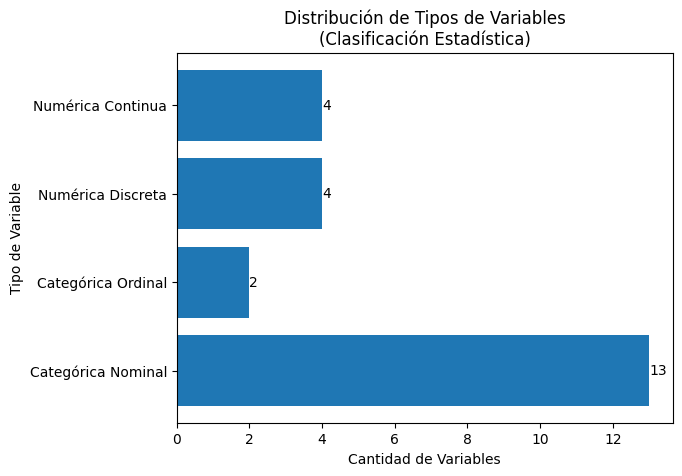

In [5]:
# Cargar dataset
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')

# Clasificación estadística de las variables
clasificacion = {
    "Categórica Nominal": [
        "MES","DEPTO","AREA","VIC_SEXO","VIC_EST_CIV","VIC_ESCOLARIDAD",
        "VIC_REL_AGR","AGR_SEXO","AGR_GRUPET","TIPAGRE","LEY_APLICABLE",
        "RECUR_DENUN","TIPO_EVENTO"
    ],
    "Categórica Ordinal": [
        "ESCOLARIDAD_HOM","ESCOLARIDAD_MUJ"
    ],
    "Numérica Discreta": [
        "ANO","DIA","TOTAL_HIJOS","MUNICIPIO"
    ],
    "Numérica Continua": [
        "VIC_EDAD","AGR_EDAD","EDAD_HOM","EDAD_MUJ"
    ]
}

# Contar variables por tipo
tipos = []
cantidades = []

for tipo, columnas in clasificacion.items():
    tipos.append(tipo)
    cantidades.append(len(columnas))

# Gráfico
plt.figure()
plt.barh(tipos, cantidades)
plt.xlabel("Cantidad de Variables")
plt.ylabel("Tipo de Variable")
plt.title("Distribución de Tipos de Variables\n(Clasificación Estadística)")

for i, v in enumerate(cantidades):
    plt.text(v, i, str(v), va='center')

plt.show()

## Exploración de variables numéricas

In [6]:
#identificar variables numéricas
df.select_dtypes(include=["number"]).columns


Index(['ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS', 'AGR_EDAD', 'MUNICIPIO',
       'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM',
       'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ'],
      dtype='object')

In [7]:
#medidas de tendencia central
df[['ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS', 'AGR_EDAD', 'MUNICIPIO',
    'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM',
    'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ']].describe()

,ANO,DIA,VIC_EDAD,TOTAL_HIJOS,AGR_EDAD,MUNICIPIO,EDAD_HOM,EDAD_MUJ,ETNIA_HOM,ETNIA_MUJ,ESCOLARIDAD_HOM,ESCOLARIDAD_MUJ,OCUPACION_HOM,OCUPACION_MUJ
count,389799.000000,389798.000000,326105.000000,265350.000000,315770.000000,61034.000000,61034.00000,61034.000000,61034.000000,61034.000000,61034.000000,61034.000000,61034.000000,61034.000000
mean,2016.010221,15.231420,33.439536,10.195659,35.915309,817.654832,479.59072,477.180588,6.254252,6.281777,5.563817,5.536471,1051.327211,1143.984451
std,3.942961,8.788519,13.659909,26.396663,14.703567,701.253275,479.99622,481.514551,2.885872,2.862847,3.210734,3.216688,2767.521287,2974.351596
min,2009.000000,1.000000,1.000000,0.000000,8.000000,101.000000,15.00000,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2012.000000,8.000000,24.000000,1.000000,26.000000,106.000000,33.00000,30.000000,4.000000,4.000000,3.000000,3.000000,61.000000,97.000000
50%,2016.000000,15.000000,30.000000,2.000000,33.000000,701.000000,53.00000,48.000000,9.000000,9.000000,4.000000,4.000000,97.000000,97.000000
75%,2019.000000,23.000000,39.000000,4.000000,41.000000,1325.000000,999.00000,999.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000
max,2022.000000,31.000000,99.000000,99.000000,99.000000,2217.000000,999.00000,999.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9999.000000


In [8]:
#desviación estándar
df[['ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS', 'AGR_EDAD', 'MUNICIPIO',
    'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM',
    'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ']].std()


ANO                   3.942961
DIA                   8.788519
VIC_EDAD             13.659909
TOTAL_HIJOS          26.396663
AGR_EDAD             14.703567
MUNICIPIO           701.253275
EDAD_HOM            479.996220
EDAD_MUJ            481.514551
ETNIA_HOM             2.885872
ETNIA_MUJ             2.862847
ESCOLARIDAD_HOM       3.210734
ESCOLARIDAD_MUJ       3.216688
OCUPACION_HOM      2767.521287
OCUPACION_MUJ      2974.351596
dtype: float64

In [9]:
#varianza
df[['ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS', 'AGR_EDAD', 'MUNICIPIO',
    'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM',
    'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ']].var()

ANO                1.554694e+01
DIA                7.723806e+01
VIC_EDAD           1.865931e+02
TOTAL_HIJOS        6.967838e+02
AGR_EDAD           2.161949e+02
MUNICIPIO          4.917562e+05
EDAD_HOM           2.303964e+05
EDAD_MUJ           2.318563e+05
ETNIA_HOM          8.328257e+00
ETNIA_MUJ          8.195894e+00
ESCOLARIDAD_HOM    1.030882e+01
ESCOLARIDAD_MUJ    1.034708e+01
OCUPACION_HOM      7.659174e+06
OCUPACION_MUJ      8.846767e+06
dtype: float64

In [10]:
#cuartiles
var_num = ['ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS', 'AGR_EDAD', 'MUNICIPIO',
    'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM',
    'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ']

for var in var_num:
    print(f"\nCuartiles de {var}")
    print(df[var].quantile([0.25, 0.5, 0.75]))



Cuartiles de ANO
0.25    2012.0
0.50    2016.0
0.75    2019.0
Name: ANO, dtype: float64

Cuartiles de DIA
0.25     8.0
0.50    15.0
0.75    23.0
Name: DIA, dtype: float64

Cuartiles de VIC_EDAD
0.25    24.0
0.50    30.0
0.75    39.0
Name: VIC_EDAD, dtype: float64

Cuartiles de TOTAL_HIJOS
0.25    1.0
0.50    2.0
0.75    4.0
Name: TOTAL_HIJOS, dtype: float64

Cuartiles de AGR_EDAD
0.25    26.0
0.50    33.0
0.75    41.0
Name: AGR_EDAD, dtype: float64

Cuartiles de MUNICIPIO
0.25     106.0
0.50     701.0
0.75    1325.0
Name: MUNICIPIO, dtype: float64

Cuartiles de EDAD_HOM
0.25     33.0
0.50     53.0
0.75    999.0
Name: EDAD_HOM, dtype: float64

Cuartiles de EDAD_MUJ
0.25     30.0
0.50     48.0
0.75    999.0
Name: EDAD_MUJ, dtype: float64

Cuartiles de ETNIA_HOM
0.25    4.0
0.50    9.0
0.75    9.0
Name: ETNIA_HOM, dtype: float64

Cuartiles de ETNIA_MUJ
0.25    4.0
0.50    9.0
0.75    9.0
Name: ETNIA_MUJ, dtype: float64

Cuartiles de ESCOLARIDAD_HOM
0.25    3.0
0.50    4.0
0.75    9.0
Nam

/var/folders/ls/r_brwh_14l54j3kt17qt0xl80000gn/T/ipykernel_23797/2915093722.py:1: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("files/Dataset_Unificado_Proyecto.csv", sep=";")


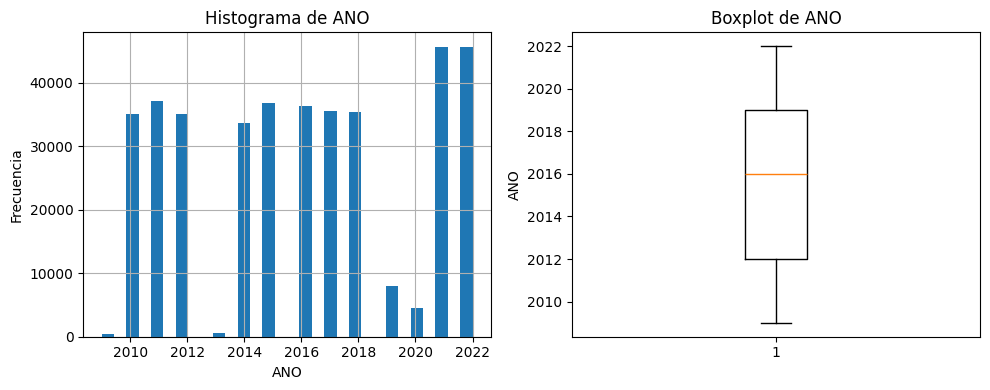

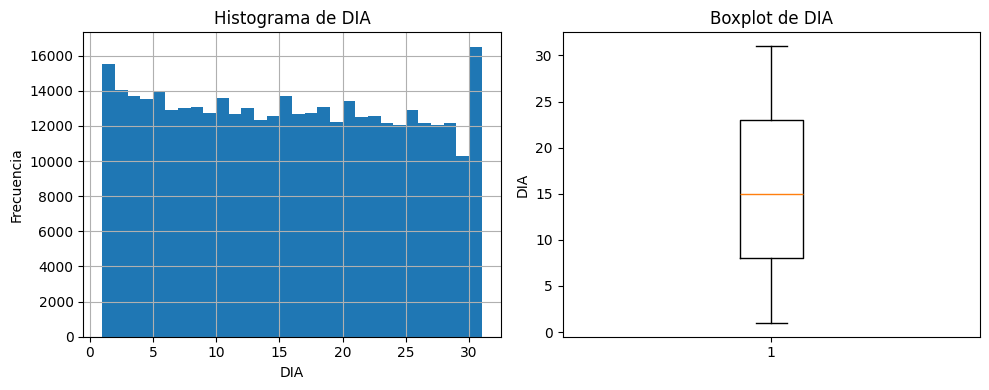

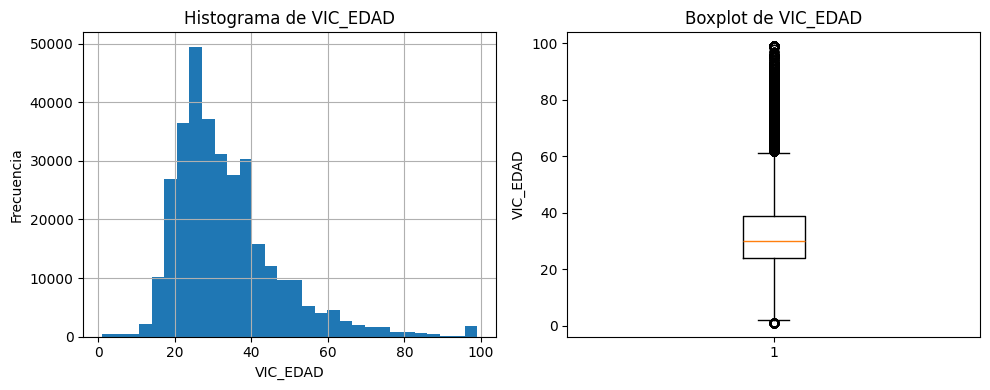

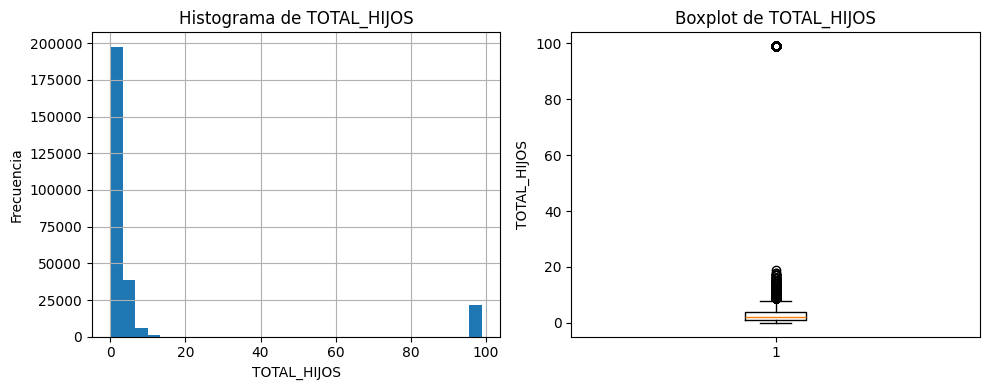

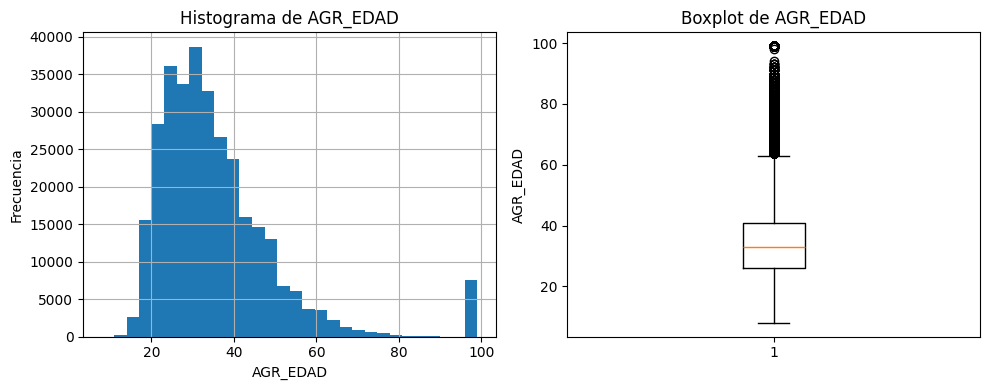

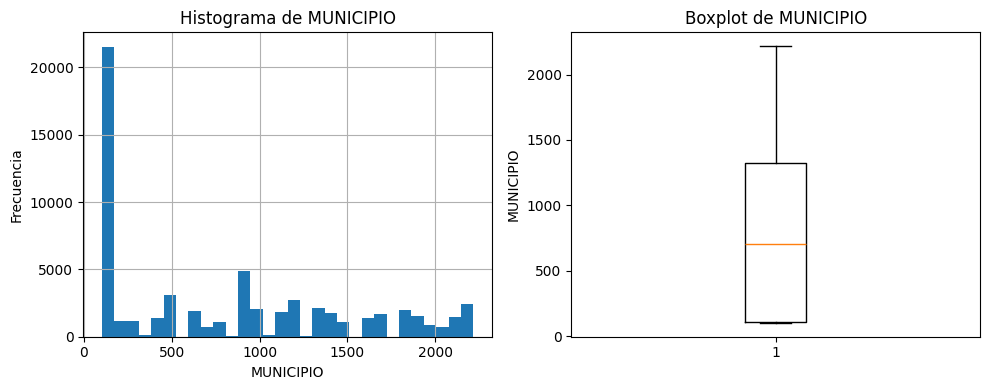

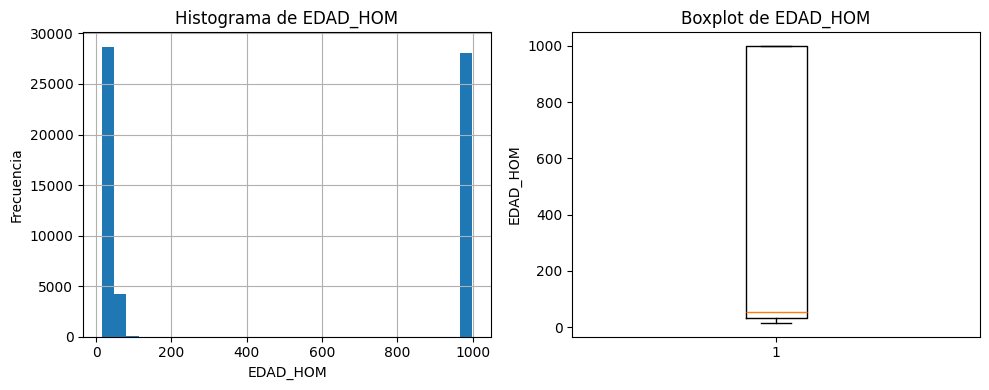

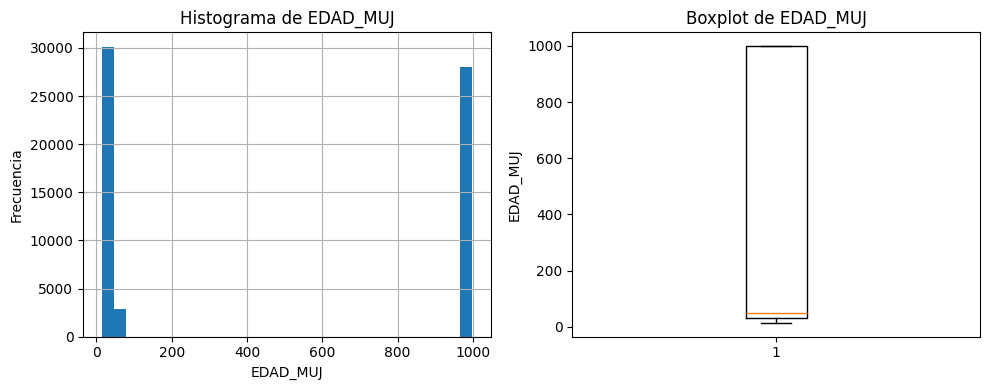

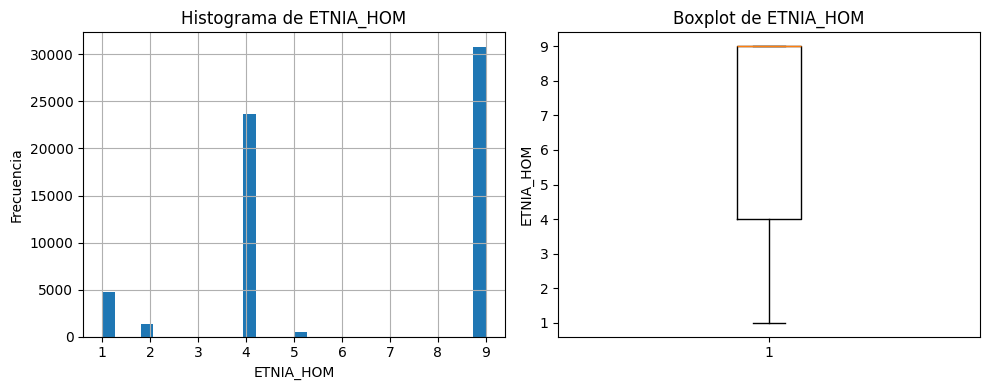

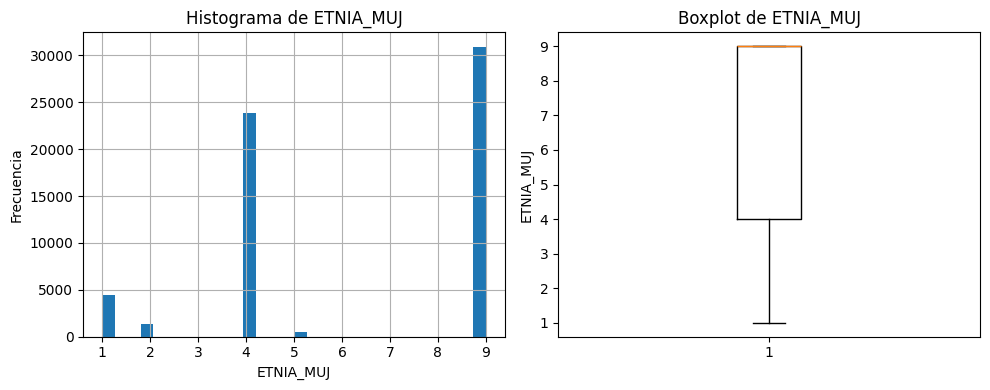

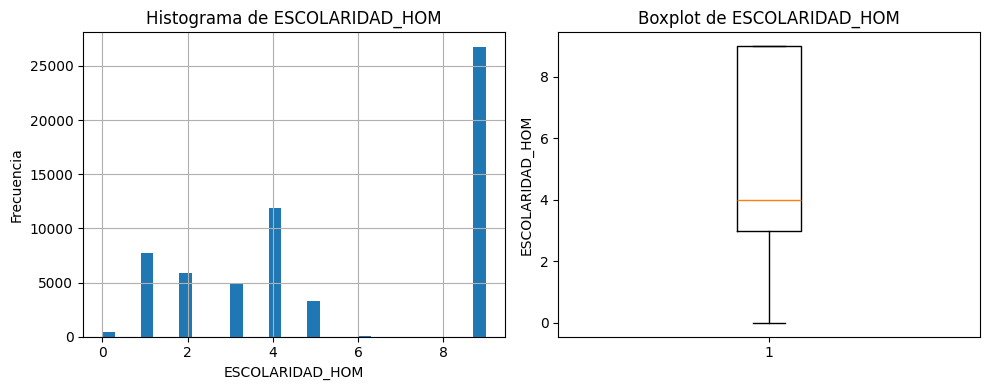

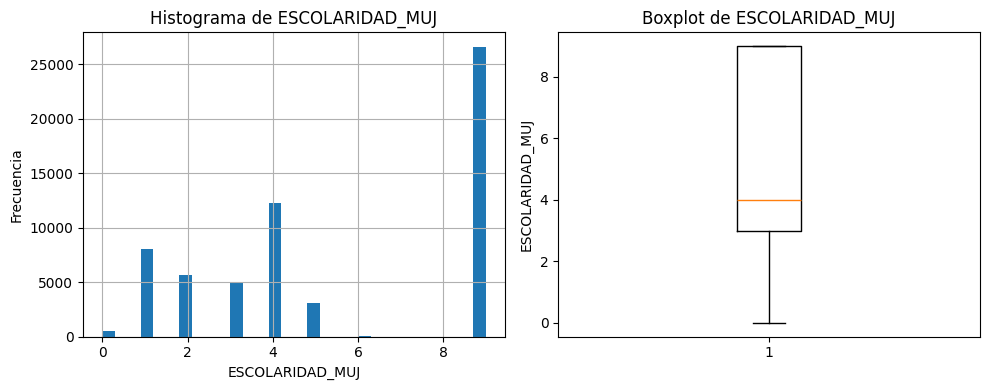

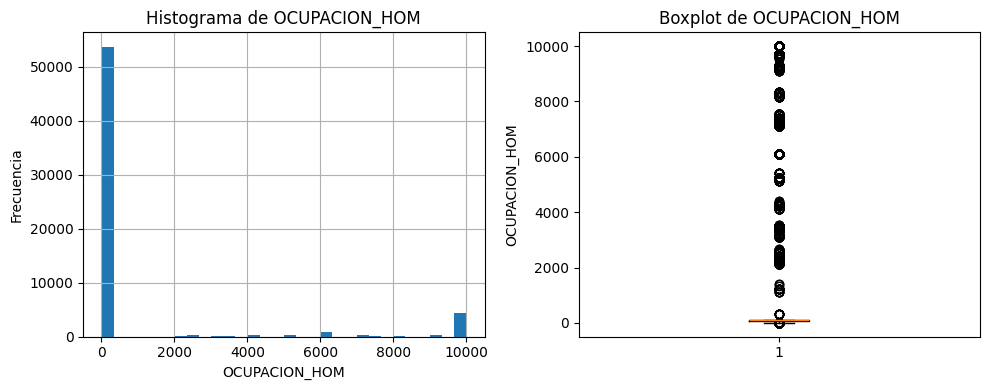

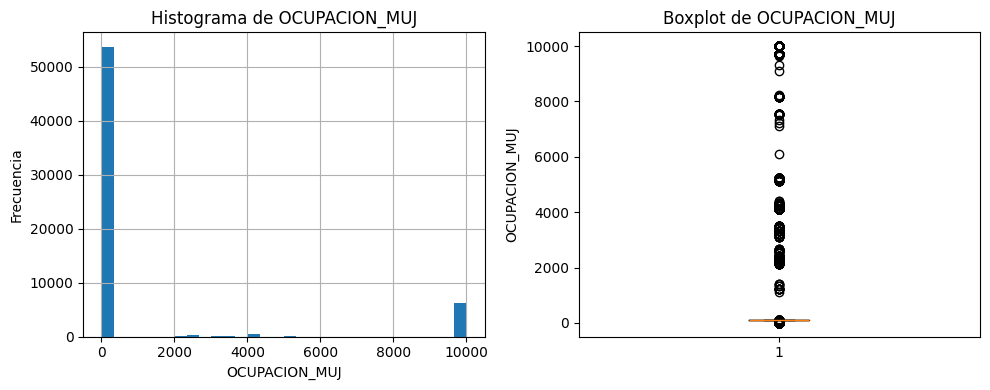

In [11]:
df = pd.read_csv("files/Dataset_Unificado_Proyecto.csv", sep=";")

for var in var_num:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    df[var].dropna().hist(bins=30)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

    plt.subplot(1, 2, 2)
    plt.boxplot(df[var].dropna())
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)

    plt.tight_layout()
    plt.show()


## Exploración de variables cuantitativas

In [12]:
# Variables cuantitativas
variables_cuantitativas = [
    'ANO', 'DIA', 'VIC_EDAD', 'TOTAL_HIJOS',
    'AGR_EDAD', 'MUNICIPIO', 'EDAD_HOM', 'EDAD_MUJ'
]

# Variables cualitativas
variables_cualitativas = [
    'ETNIA_HOM', 'ETNIA_MUJ',
    'ESCOLARIDAD_HOM', 'ESCOLARIDAD_MUJ',
    'OCUPACION_HOM', 'OCUPACION_MUJ'
]

# ---------- TABLA CUANTITATIVAS ----------
tablas_cuant = []

for var in variables_cuantitativas:
    freq_abs = df[var].value_counts(dropna=False)
    freq_rel = df[var].value_counts(normalize=True, dropna=False) * 100

    tabla = pd.DataFrame({
        'Variable': var,
        'Valor': freq_abs.index.astype(str),
        'Frecuencia': freq_abs.values,
        'Frecuencia (%)': freq_rel.round(2).values
    })

    tablas_cuant.append(tabla)

tabla_frecuencias_cuantitativas = pd.concat(tablas_cuant, ignore_index=True)

tabla_frecuencias_cuantitativas


,Variable,Valor,Frecuencia,Frecuencia (%)
0,ANO,2021.0,45655,11.71
1,ANO,2022.0,45602,11.70
2,ANO,2011.0,37145,9.53
3,ANO,2015.0,36788,9.44
4,ANO,2016.0,36258,9.30
...,...,...,...,...
737,EDAD_MUJ,78.0,3,0.00
738,EDAD_MUJ,77.0,2,0.00
739,EDAD_MUJ,14.0,2,0.00
740,EDAD_MUJ,81.0,1,0.00


## Exploración de variables cualitativas

In [13]:
# ---------- TABLA CUALITATIVAS ----------
tablas_cual = []

for var in variables_cualitativas:
    freq_abs = df[var].value_counts(dropna=True)
    freq_rel = df[var].value_counts(normalize=True, dropna=True) * 100

    tabla = pd.DataFrame({
        'Variable': var,
        'Categoría': freq_abs.index.astype(str),
        'Frecuencia': freq_abs.values,
        'Frecuencia (%)': freq_rel.round(2).values
    })

    tablas_cual.append(tabla)

tabla_frecuencias_cualitativas = pd.concat(tablas_cual, ignore_index=True)

tabla_frecuencias_cualitativas

,Variable,Categoría,Frecuencia,Frecuencia (%)
0,ETNIA_HOM,9.0,30797,50.46
1,ETNIA_HOM,4.0,23676,38.79
2,ETNIA_HOM,1.0,4756,7.79
3,ETNIA_HOM,2.0,1306,2.14
4,ETNIA_HOM,5.0,490,0.80
...,...,...,...,...
366,OCUPACION_MUJ,4223.0,1,0.00
367,OCUPACION_MUJ,7122.0,1,0.00
368,OCUPACION_MUJ,3212.0,1,0.00
369,OCUPACION_MUJ,3214.0,1,0.00


In [14]:
# ------- Ejemplos ---------
#Tabla de frecuencias
def tabla_frecuencias(df, columna):
    freq_abs = df[columna].value_counts(dropna=False)
    freq_rel = df[columna].value_counts(normalize=True, dropna=False) * 100

    tabla = pd.DataFrame({
        "Frecuencia": freq_abs,
        "Frecuencia (%)": freq_rel.round(2)
    })
    return tabla

#Limpiar datos
df['VIC_SEXO'] = df['VIC_SEXO'].str.strip().str.capitalize()
df['AGR_SEXO'] = df['AGR_SEXO'].str.strip().str.capitalize()

df['VIC_SEXO'] = df['VIC_SEXO'].astype(str).str.strip()
df['AGR_SEXO'] = df['AGR_SEXO'].astype(str).str.strip()

df['DEPTO'] = df['DEPTO'].str.strip().str.capitalize()

df = df[~df['VIC_SEXO'].isin([1, 2])]
df = df[~df['AGR_SEXO'].isin([1, 2])]

df = df[~df['VIC_SEXO'].isin(['1', '2'])]
df = df[~df['AGR_SEXO'].isin(['1', '2'])]


#Sexo
tabla_vic_sexo = tabla_frecuencias(df, "VIC_SEXO")
tabla_vic_sexo

tabla_vic_sexo = (
    df['VIC_SEXO']
    .value_counts()
    .reset_index()
    .rename(columns={
        'index': 'Sexo',
        'VIC_SEXO': 'Frecuencia'
    })
)

tabla_vic_sexo


,Frecuencia,count
0,Mujeres,201625
1,nan,94887
2,Hombres,22807


In [15]:
#Departamento
top_n = 10

depto_counts = df['DEPTO'].value_counts().head(top_n)

#Tabla de frecuencias
tabla_depto = (
    df['DEPTO']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Departamento', 'DEPTO':'Frecuencia'})
)

tabla_depto.head(10)

,Frecuencia,count
0,Guatemala,30083
1,101,6800
2,Quetzaltenango,6363
3,Cob�n,4142
4,Jutiapa,4116
5,San marcos,4090
6,Retalhuleu,3990
7,Escuintla,3905
8,Villa nueva,3719
9,Mixco,3715


In [16]:
#Año
tabla_year = (
    df['ANO']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Año', 'ANO':'Frecuencia'})
)
tabla_year

,Frecuencia,count
0,2022.0,43257
1,2011.0,37142
2,2015.0,36784
3,2016.0,36253
4,2017.0,35524
5,2018.0,35346
6,2012.0,35009
7,2014.0,33632
8,2021.0,9706
9,2019.0,7886


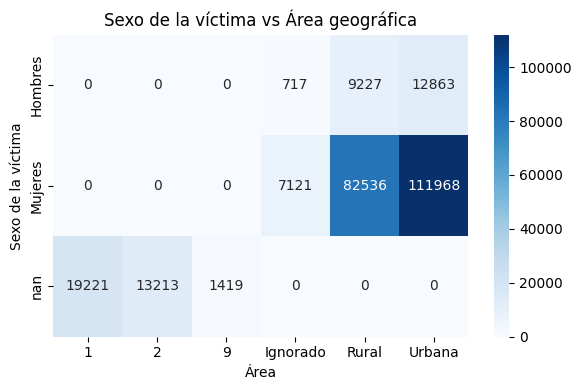

In [17]:
#Tabla cruzada
tabla_vic_area = pd.crosstab(df['VIC_SEXO'], df['AREA'])
tabla_vic_area

#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(tabla_vic_area, annot=True, fmt='d', cmap='Blues')
plt.title('Sexo de la víctima vs Área geográfica')
plt.xlabel('Área')
plt.ylabel('Sexo de la víctima')
plt.tight_layout()
plt.show()



## Relaciones entre las variables

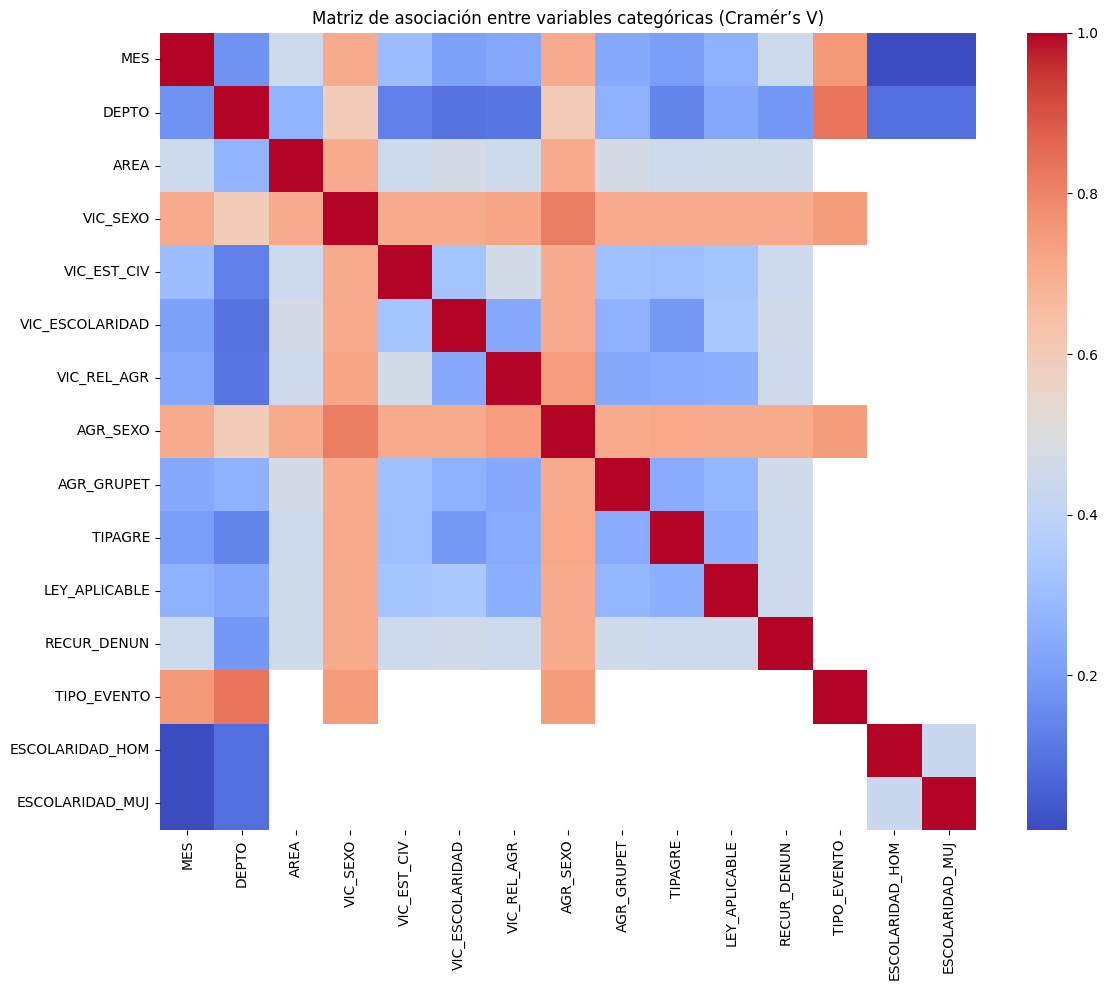

In [18]:
categoricas = [
    col for col in (
        clasificacion["Categórica Nominal"] +
        clasificacion["Categórica Ordinal"]
    )
    if col in df.columns
]

def cramers_v_safe(x, y):
    # Eliminar NaN solo para este par
    valid = pd.DataFrame({'x': x, 'y': y}).dropna()
    
    if valid.empty:
        return np.nan

    tabla = pd.crosstab(valid['x'], valid['y'])

    if tabla.size == 0 or tabla.shape[0] < 2 or tabla.shape[1] < 2:
        return np.nan

    chi2 = chi2_contingency(tabla)[0]
    n = tabla.sum().sum()

    if n == 0:
        return np.nan

    phi2 = chi2 / n
    r, k = tabla.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / max(1, min((kcorr-1), (rcorr-1))))

cramers_matrix = pd.DataFrame(
    index=categoricas,
    columns=categoricas,
    dtype=float
)

for var1 in categoricas:
    for var2 in categoricas:
        cramers_matrix.loc[var1, var2] = cramers_v_safe(
            df[var1], df[var2]
        )

plt.figure(figsize=(12,10))
sns.heatmap(
    cramers_matrix,
    cmap='coolwarm',
    annot=False,
    mask=cramers_matrix.isna()
)
plt.title("Matriz de asociación entre variables categóricas (Cramér’s V)")
plt.tight_layout()
plt.show()



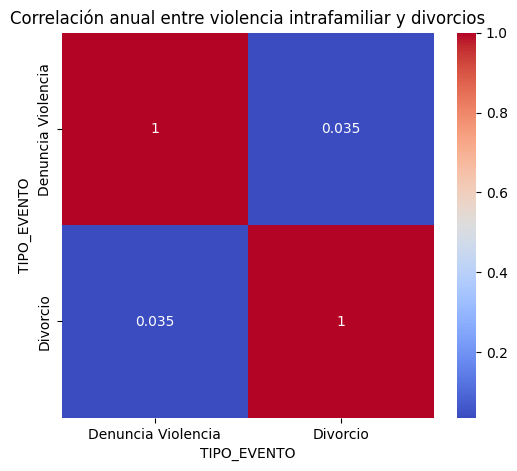

In [19]:
#Divorcios
df['TIPO_EVENTO'].value_counts()

#Agrupa por año
tabla_anual = (
    df.groupby(['ANO', 'TIPO_EVENTO'])
      .size()
      .unstack(fill_value=0)
)

tabla_anual.head()

#correlación violencia y divorcios
correlacion = tabla_anual.corr()

correlacion

#Heatmap de correlación
plt.figure(figsize=(6,5))
sns.heatmap(
    tabla_anual.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlación anual entre violencia intrafamiliar y divorcios")
plt.show()




/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


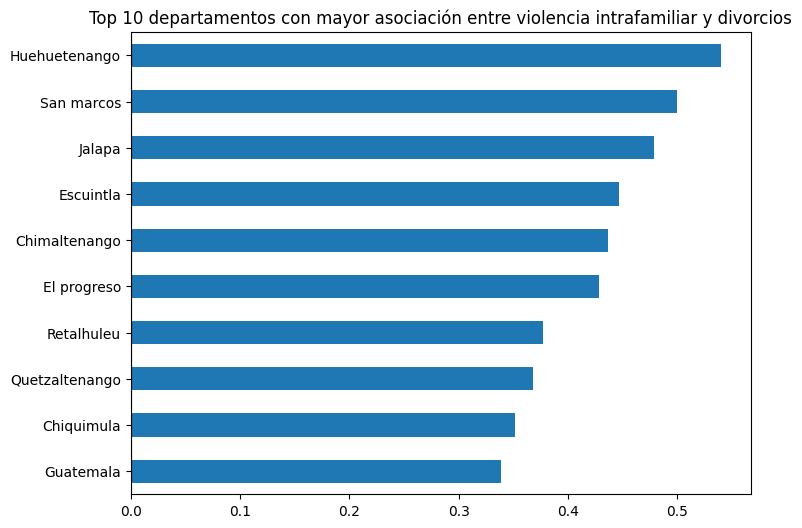

In [23]:
#Por región
tabla_depto_anual = (
    df.groupby(['DEPTO','ANO','TIPO_EVENTO'])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

correlaciones_depto = {}

for depto in df['DEPTO'].unique():
    sub = tabla_depto_anual[tabla_depto_anual['DEPTO']==depto]
    if 'Denuncia Violencia' in sub.columns and 'Divorcio' in sub.columns:
        correlaciones_depto[depto] = sub['Denuncia Violencia'].corr(sub['Divorcio'])

correlaciones_depto = pd.Series(correlaciones_depto).sort_values(ascending=False)
correlaciones_depto.head()

min_registros = 5  # mínimo años válidos

correlaciones_filtradas = correlaciones_depto[
    correlaciones_depto.notna()
]

correlaciones_filtradas = correlaciones_filtradas[
    correlaciones_filtradas.index.isin(
        df['DEPTO'].value_counts()[df['DEPTO'].value_counts() > 100].index
    )
]

correlaciones_filtradas.sort_values()

top10 = correlaciones_filtradas.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top10.sort_values().plot(kind='barh')
plt.title("Top 10 departamentos con mayor asociación entre violencia intrafamiliar y divorcios")
plt.axvline(0, color='black')
plt.show()




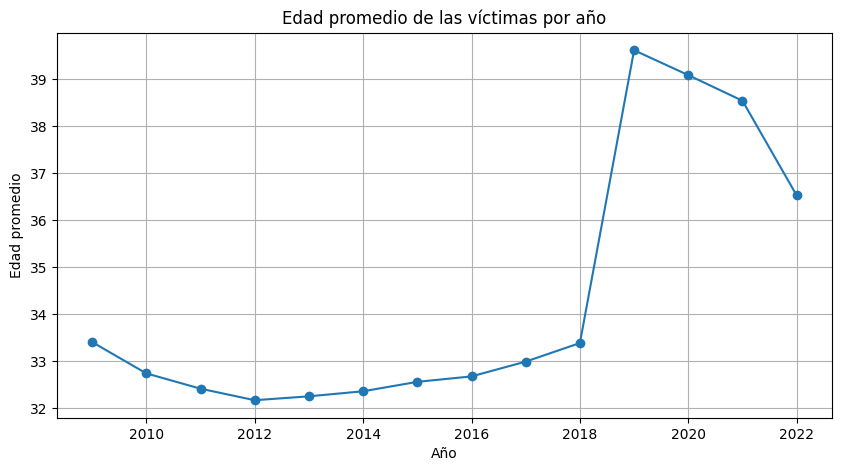

In [24]:
#edad promedio víctimas por año
edad_promedio = df.groupby('ANO')['VIC_EDAD'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(edad_promedio['ANO'], edad_promedio['VIC_EDAD'], marker='o')
plt.title("Edad promedio de las víctimas por año")
plt.xlabel("Año")
plt.ylabel("Edad promedio")
plt.grid()
plt.show()

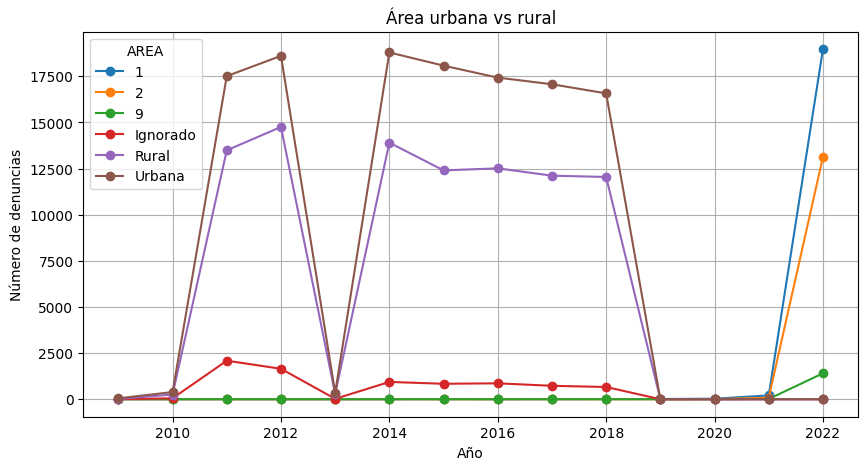

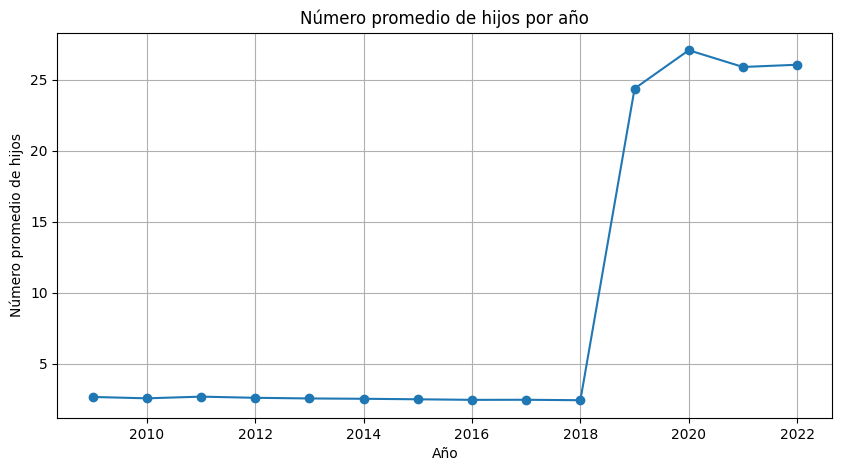

In [26]:
area_anual = (
    df.groupby(['ANO','AREA'])
      .size()
      .unstack(fill_value=0)
)
area_anual.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Área urbana vs rural")
plt.xlabel("Año")
plt.ylabel("Número de denuncias")
plt.grid()
plt.show()

#total hijos promedio por año
hijos_promedio = df.groupby('ANO')['TOTAL_HIJOS'].mean()
plt.figure(figsize=(10,5))
plt.plot(hijos_promedio.index, hijos_promedio, marker='o')
plt.title("Número promedio de hijos por año")
plt.xlabel("Año")
plt.ylabel("Número promedio de hijos")
plt.grid()
plt.show()